# Exploratory Analysis of Ford GoBike System Data 
## by ( Tijani Ibraheem)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system 
covering the greater San Francisco Bay area. The dataset has 16 original columns that 
contain some important columns relevant for our analysis and a few that are out of our 
question scopes






## Preliminary Wrangling

### For a better experience, the current seaborn version needs upgrade
- Update the seaborn version to version 0.9.0 so we can use some most recent functions in seaborn

In [1]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 12.1MB/s ta 0:00:01
  Found existing installation: seaborn 0.8.1
    Uninstalling seaborn-0.8.1:
      Successfully uninstalled seaborn-0.8.1


### Import all necessary packages

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Load the Ford GoBike System Data


In [3]:
#code
original_data = pd.read_csv('201902-fordgobike-tripdata.csv', parse_dates=['start_time', 'end_time'])

In [4]:
#test
original_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# check dataset info
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

### What is the structure of your dataset?

> The dataset contains 183411 records and 16 variables. Some features have null values. 6 columns have missing values. We also have 2 datetime objects, 7 floats and 5 objects datatypes

### What is/are the main feature(s) of interest in your dataset?

> These are all depend on a some feature such as `duration`, `member_gender`, `start_time`, `end_time`

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `duration_sec`,  `start_station_name`,`end_station_name`, `user_type`, `bike_share_for_all_trip` are some of the features that are likely to come in really handy

### Possible Questions to answer

- What time of the days, time of the day do we normally have high rentals of bikes. 
- Are bikes rented mostly by customers or subscribers
- Are men the ones that rents more bikes or women.
- what are the busiest stations 

### Data Wrangling

In [6]:
# Make a copy of the original dataset
go_bike_df = original_data.copy()

### Create 2 new columns from the durations in minutes and hours
- Divide the duration_min by 60 to convert the each value to a corresponding value in minutes
- Then, we divide the new column created by 60 too, to create a new column in hours

In [7]:
# create a function that can convert the duration_sec column that is in seconds
# into a more readable format such as minutes or hours

go_bike_df['duration_min'] = go_bike_df['duration_sec']/60
go_bike_df['duration_hr'] = go_bike_df['duration_min']/(60)


### Clean a few columns that need to be transformed to specific datatypes
- Change the date column to datetime from object type
- Next, create a new column to extract the time
- Extract the year of rents and save in a new column
- Convert the customer birth year to a float type, that we can perform a numerical calculation with it, such as calculating the age

In [8]:
# Change the datetime columns datatypes to datetime objects

#go_bike_df['start_time'] = pd.to_datetime(go_bike_df['start_time'])
#go_bike_df['end_time'] = pd.to_datetime(go_bike_df['end_time'])

# create 2 column, start_date and start_time from the old start_time column 
go_bike_df['start_date'] = pd.to_datetime(go_bike_df['start_time']).dt.date
go_bike_df['new_start_time'] = pd.to_datetime(go_bike_df['start_time']).dt.time

go_bike_df['end_date'] = pd.to_datetime(go_bike_df['end_time']).dt.date
go_bike_df['new_end_time'] = pd.to_datetime(go_bike_df['end_time']).dt.time

# what year the bike was rented, this will be used to calculate the renter's age the 
# point of rentage
go_bike_df['rent_year'] = pd.to_datetime(go_bike_df['end_date']).dt.year

#convert the member_birth_column to integer, this will help to make 
#calculation easier
go_bike_df['member_birth_year'] = go_bike_df['member_birth_year'].astype(float)


go_bike_df['age'] = go_bike_df['rent_year'] - go_bike_df['member_birth_year']
go_bike_df['age'] = go_bike_df['age'].astype('float')

# The days of the months extracted
go_bike_df['start_time_weekday']=go_bike_df['start_time'].dt.strftime('%a')

In [9]:
go_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 25 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
duration_min               183412 non-null float64
duration_hr      

### Select only the first part of a splited column
- Because the new date and time columns have been changed to floating data types, we need to split them over the period then select the first part

In [10]:
# select the time before the decimal point only
go_bike_df['new_start_time'] = go_bike_df['new_start_time'].astype('str').str.split('.').str[0]
go_bike_df['new_end_time'] = go_bike_df['new_end_time'].astype('str').str.split('.').str[0]

### Create 2 new columns of day and month. This will select the day and month part of the necessary date column

In [11]:
# Create days and months that are accountable for each rentals
go_bike_df['day'] = go_bike_df['start_date'].apply(lambda x:x.day).astype(int)
go_bike_df['month'] = go_bike_df['start_date'].apply(lambda x:x.month).astype(int)

In [12]:
go_bike_df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,duration_hr,start_date,new_start_time,end_date,new_end_time,rent_year,age,start_time_weekday,day,month
63922,450,2019-02-20 13:27:38.078,2019-02-20 13:35:08.135,281.0,9th St at San Fernando St,37.338395,-121.880797,283.0,Delmas Ave and San Fernando St,37.330264,...,0.125,2019-02-20,13:27:38,2019-02-20,13:35:08,2019,21.0,Wed,20,2


### Find out how many missing vaues are there in each column
- At this stage, we have 7 missing dataset columns. This is done using the sum() function on isnull() and the dataset

In [13]:
go_bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
duration_min                  0
duration_hr                   0
start_date                    0
new_start_time                0
end_date                      0
new_end_time                  0
rent_year                     0
age                        8265
start_time_weekday            0
day                           0
month                         0
dtype: int64

### Are there any duplicates in the data?
- Call the sum() function on the duplicate() that is called on the dataset to find any possible duplicate

In [14]:
# Are there any duplicate records
go_bike_df.duplicated().sum()

0

### Remove any unnecessary column and leave only those that are needed
- Use the drop() to delete the columns that are not needed

In [15]:
# Which columns are not needed and should be dropped
go_bike_df2 = go_bike_df.drop(['duration_sec','start_time','end_time','start_station_id','start_station_latitude',
                               'start_station_longitude','start_station_longitude','end_station_id','end_station_latitude',
                              'end_station_longitude','bike_id'], axis=1)

In [16]:
go_bike_df2.head()

,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,start_date,new_start_time,end_date,new_end_time,rent_year,age,start_time_weekday,day,month
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,869.750000,14.495833,2019-02-28,17:32:10,2019-03-01,08:01:55,2019,35.0,Thu,28,2
1,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,No,708.683333,11.811389,2019-02-28,18:53:21,2019-03-01,06:42:03,2019,NaN,Thu,28,2
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030.900000,17.181667,2019-02-28,12:13:13,2019-03-01,05:24:08,2019,47.0,Thu,28,2
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,608.166667,10.136111,2019-02-28,17:54:26,2019-03-01,04:02:36,2019,30.0,Thu,28,2
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26.416667,0.440278,2019-02-28,23:54:18,2019-03-01,00:20:44,2019,45.0,Thu,28,2


## Univariate Exploration


### What is the ditribution of bike rental duration by hours

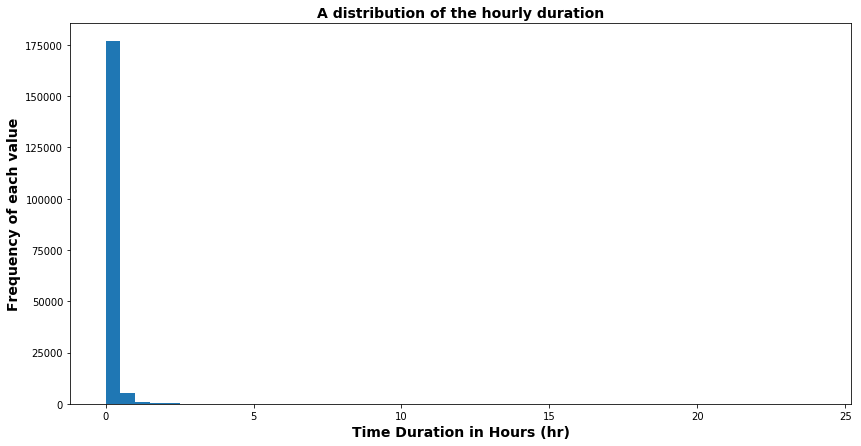

In [17]:
# set bin sizes
bins = np.arange(0, go_bike_df2['duration_hr'].max()+.5, .5)

# Plot the histogram of the duration to understand what's going on
plt.hist(data = go_bike_df2, x = 'duration_hr', bins = bins)

# Enlarge the plot
plt.gcf().set_size_inches(14, 7)

# Axis labels
plt.ylabel('Frequency of each value', fontsize=14,fontweight='bold')
plt.xlabel('Time Duration in Hours (hr)',fontsize=14,fontweight='bold')
plt.title('A distribution of the hourly duration',fontsize=14,fontweight='bold')
plt.show()

### Assess the data summary description

In [18]:
go_bike_df2.describe()

,member_birth_year,duration_min,duration_hr,rent_year,age,day,month
count,175147.000000,183412.000000,183412.000000,183412.0,175147.000000,183412.000000,183412.0
mean,1984.806437,12.101307,0.201688,2019.0,34.193563,15.298977,2.0
std,10.116689,29.906496,0.498442,0.0,10.116689,8.028187,0.0
min,1878.000000,1.016667,0.016944,2019.0,18.000000,1.000000,2.0
25%,1980.000000,5.416667,0.090278,2019.0,27.000000,8.000000,2.0
50%,1987.000000,8.566667,0.142778,2019.0,32.000000,15.000000,2.0
75%,1992.000000,13.266667,0.221111,2019.0,39.000000,22.000000,2.0
max,2001.000000,1424.066667,23.734444,2019.0,141.000000,28.000000,2.0


> From the last 2 cells, the histogram tells us that, the largest share of the duration of bike hire is under 5 hrs. However, the summary statistics on the other hand tells us that there is an outrageous value of almost 24 hrs. I will take this as an outlier

### Subset the data by removing outliers
- The data has outliers with a very few data above 3 hours. These have an effect on the distribution of the overall data analysis. This can be remove and the new data saved in a variable called `go_bike_df_with_no_outlier`

In [19]:
# subset the dataset to exclude the outliers
go_bike_df_with_no_outlier = go_bike_df2[go_bike_df2['duration_hr']<=3]

### After the subset, we can again, check the distribution of these new subseted dataset

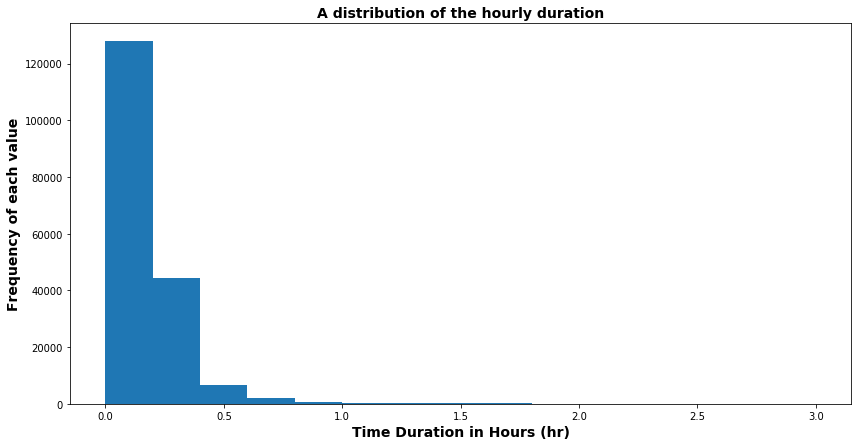

In [20]:
# Set bins size
bins = np.arange(0, go_bike_df_with_no_outlier['duration_hr'].max()+.2, .2)

# Plot the distribution
plt.hist(data = go_bike_df_with_no_outlier, x = 'duration_hr', bins = bins)

# Enlarge the plot
plt.gcf().set_size_inches(14, 7)

# Axis labels
plt.ylabel('Frequency of each value', fontsize=14,fontweight='bold')
plt.xlabel('Time Duration in Hours (hr)',fontsize=14,fontweight='bold')
plt.title('A distribution of the hourly duration',fontsize=14,fontweight='bold')
plt.show()

### A customer with that is 141 years old is clearly an outlier
- Filter out data record that 

In [21]:
# There is a customer that is 141 years old, hmmmmm, that doesn't sound realistic. And even if there was actually a superwoman 
# that was as old as that, we might want to take it out so that we can have a fair and normal distribution
go_bike_df_with_no_outlier[go_bike_df_with_no_outlier['age']==141]

,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,start_date,new_start_time,end_date,new_end_time,rent_year,age,start_time_weekday,day,month
27370,San Francisco Ferry Building (Harry Bridges Pl...,24th St at Bartlett St,Customer,1878.0,Female,No,24.566667,0.409444,2019-02-25,09:28:42,2019-02-25,09:53:17,2019,141.0,Mon,25,2


In [22]:
# subset the dataset to exclude the outliers
go_bike_df_with_no_outlier = go_bike_df_with_no_outlier[go_bike_df_with_no_outlier['age']<=100]

### Distribution of Bike ride duration in minutes
- With outliers out of the way, we can now plot a duration_min distribution. The most frequent duration riders spent on bike hires are under 10 mins.

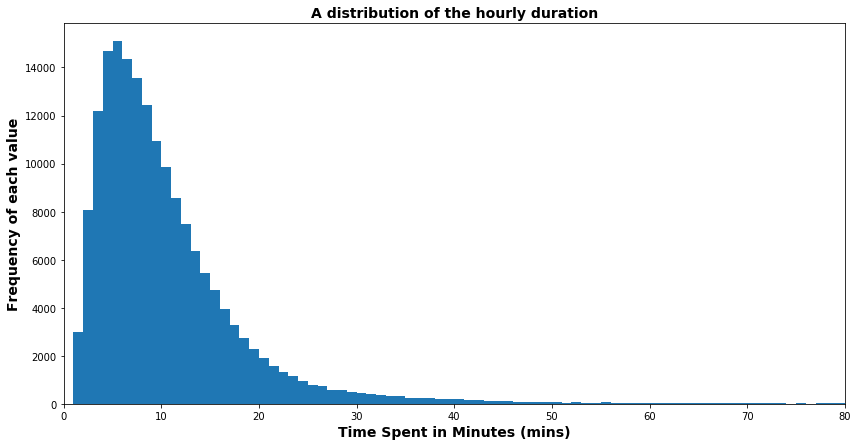

In [23]:
# Show the distribution of the duration in mins, this displays a clear view of what is happening in the hours
bins = np.arange(0, go_bike_df_with_no_outlier['duration_min'].max()+1, 1)
plt.hist(data = go_bike_df_with_no_outlier, x = 'duration_min', bins = bins)

# Enlarge the plot
plt.gcf().set_size_inches(14, 7)

# Axis labels
plt.ylabel('Frequency of each value', fontsize=14,fontweight='bold')
plt.xlabel('Time Spent in Minutes (mins)',fontsize=14,fontweight='bold')
plt.title('A distribution of the hourly duration',fontsize=14,fontweight='bold')

# Zoom in to the 0 nto 80 mins duration range
plt.xlim((0,80))
plt.show()

### Daily Distribution of rentals
- Verify which day of the week records highest and lowest activities, it is clear that weekends are not favorable on a general sense while weekdays have recorded the highest records especially Thursdays

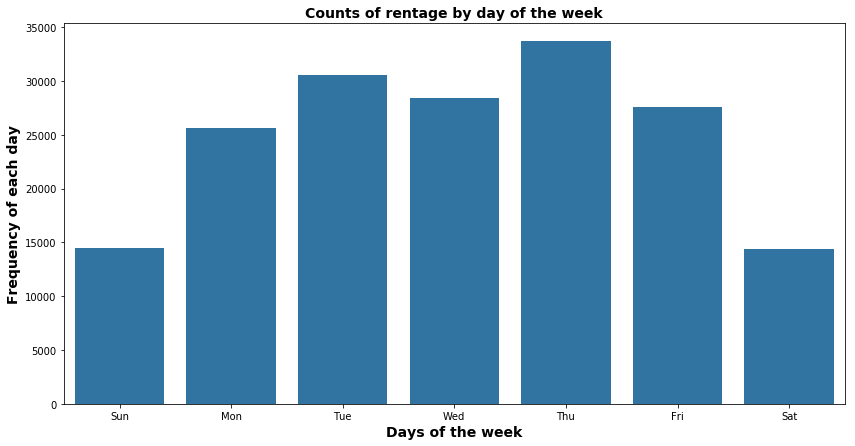

In [24]:
# Which month do we record the highest number of rentals
days = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

# Sort the days
sorted_days = pd.api.types.CategoricalDtype(categories=days, ordered=True);
go_bike_df_with_no_outlier['start_time_weekday'] = go_bike_df_with_no_outlier['start_time_weekday'].astype(sorted_days);

#Plot a distribution of rentals by count per day
sb.countplot(data=go_bike_df_with_no_outlier,x='start_time_weekday', color=sb.color_palette()[0]);

# Enlarge the plot
plt.gcf().set_size_inches(14, 7)

# Axis labels
plt.ylabel('Frequency of each day', fontsize=14,fontweight='bold');
plt.xlabel('Days of the week',fontsize=14,fontweight='bold');
plt.title('Counts of rentage by day of the week',fontsize=14,fontweight='bold');


### Gender distribution by percentage
- Using a pie chart to assess the distribution of gender column, it is observed that, 75% of the customers that are males and 23% are females and just 2% Other gender. This can further be investigated later to know what user type they belong to.

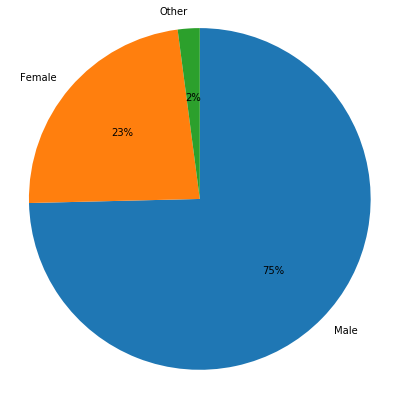

In [25]:
#plt.figure(figsize=[6,6]);
sorted_counts = go_bike_df_with_no_outlier['member_gender'].value_counts();

# PLot the pie chart and set the percentage values in the sectors
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%.0f%%');

# Enlarge the plot with this line of code
plt.gcf().set_size_inches(14, 7)

# This code of line resizes the chart from an ovally shaped plot into a perfectly circled plot
plt.axis('square');

### A chart showing a distribution of user types

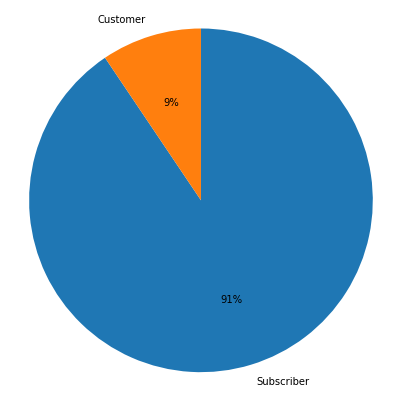

In [26]:
#plt.figure(figsize=[6,6]);
sorted_usertype = go_bike_df_with_no_outlier['user_type'].value_counts();

plt.pie(sorted_usertype, labels = sorted_usertype.index, startangle = 90, counterclock = False,autopct='%.0f%%');
plt.gcf().set_size_inches(14, 7)
plt.axis('square');

> Wow, 91% of our users are Subscribers

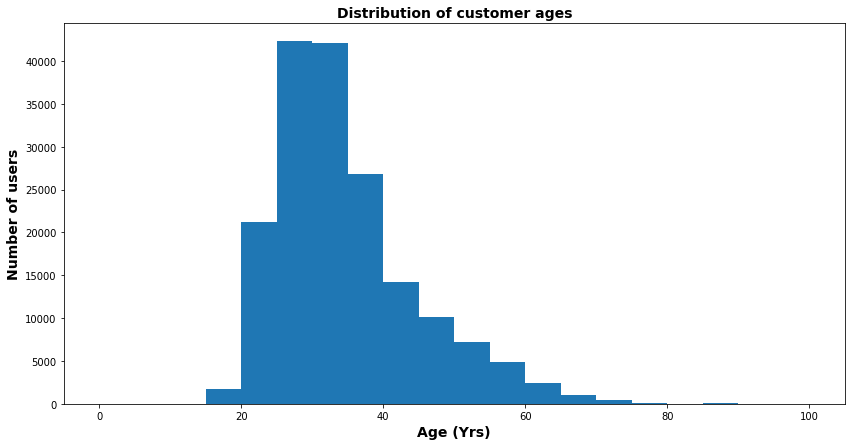

In [27]:
#plt.figure(figsize=[10,6])
plt.hist(data = go_bike_df_with_no_outlier.dropna(), x ='age', bins=np.arange(0,go_bike_df_with_no_outlier['age'].max()+5,5));

# Enlarge plot size
plt.gcf().set_size_inches(14, 7)

# Axis labels
plt.ylabel('Number of users', fontsize=14,fontweight='bold');
plt.xlabel('Age (Yrs)',fontsize=14,fontweight='bold');
plt.title('Distribution of customer ages',fontsize=14,fontweight='bold');


> This plot indicates that the distribution of our user are more concentrated in the 20 and 40 years age mark

In [28]:
go_bike_df_with_no_outlier.duration_hr.max()

2.9847222222222225

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There is a skewness in the data. Majority of selected columns are concentrated to the left and hence, there was need to perhaps zoom in to them. Working with the duration_sec column wouldn't be very intuitive at a glance due to the high values not being humanly friendly, so I transformed them into minutes and hours column. These are easier to detect if a duration is abnormally high.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Immediately the data was plotted for distribution of bike rent by hours, there was an obvious outlier on the graph that shows 
that most of our data were located between the 0 and 2.5 hrs. A new column was created along the way to coin out an age column by performing a simple calculation between the rent year and member birth year column. I can't imagine a 141 year old woman renting a bike, that was most likely an outlier that had to be removed too. So, this prompted a further zoom into the data by removing anything above 100 years old.

## Bivariate Exploration



### Write a function that can be used to plot the top 10 and botttom 10 values of a desired variable

In [29]:
def top_bottom_stations(data,row='name',col=None,top=True,pal_col=None,xlabel=None,ylabel=None,title=None):
    
    """
        Depending on the value of top argument specified, the function will either plot the top 10
        or bottom 10 values of a desired column. If top is True, then we plot the top 10 values while
        bottom 10 will be plotted if top is set to False
    """
    if top:
        most_used_start_stations = data[col].value_counts().head(10).reset_index()
        most_used_start_stations = most_used_start_stations.rename({"index":"name"}, axis=1)
        
        sb.set(style="whitegrid")
        pal = sb.color_palette(pal_col, len(most_used_start_stations))
        
        sb.barplot(data=most_used_start_stations,y=row,x=col, palette=np.array(pal[::-1]))
        plt.gcf().set_size_inches(14, 8)
        
        plt.xlabel(xlabel, fontsize=14,fontweight='semibold');
        plt.ylabel(ylabel, fontsize=14,fontweight='semibold');
        plt.title(title, fontsize=14,fontweight='semibold');
        
    else:
        most_used_start_stations = data[col].value_counts().tail(10).reset_index()
        most_used_start_stations = most_used_start_stations.rename({"index":"name"}, axis=1)
        
        sb.set(style="whitegrid")
        pal = sb.color_palette(pal_col, len(most_used_start_stations))
        
        sb.barplot(data=most_used_start_stations,y=row,x=col, palette=np.array(pal[::-1]))
        plt.gcf().set_size_inches(14, 8)
        plt.xticks([0,3,6,9,12,15,18,21]);
        
        plt.xlabel(xlabel, fontsize=14,fontweight='semibold');
        plt.ylabel(ylabel, fontsize=14,fontweight='semibold');
        plt.title(title, fontsize=14,fontweight='semibold');
        

### What are the top departing 10 stations 
- Which stations are the busiest. The busiest departing station is `Market St at 10th St` with over 3500 records.  

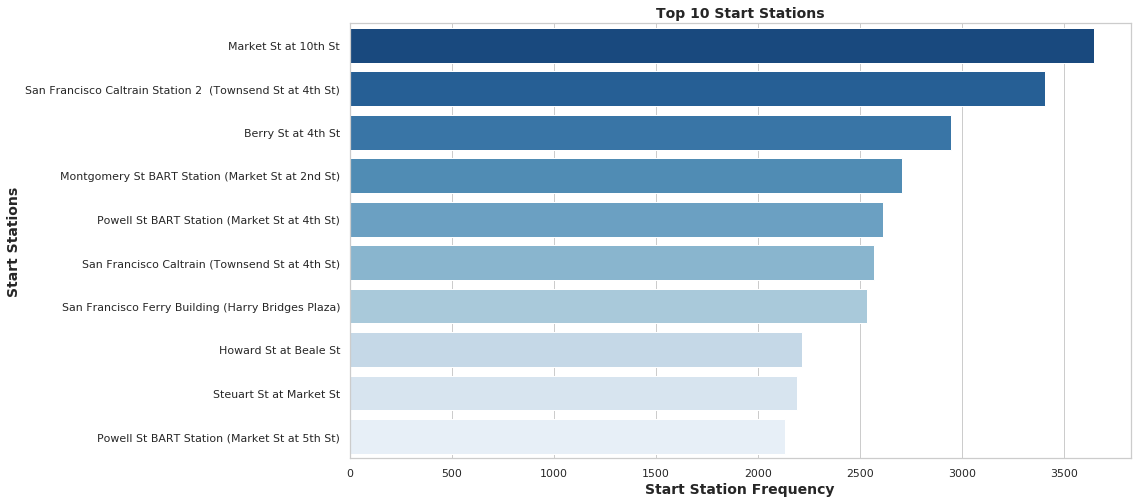

In [30]:
top_bottom_stations(go_bike_df_with_no_outlier,top=True,pal_col='Blues',col='start_station_name',
                   xlabel='Start Station Frequency',
                   ylabel='Start Stations',
                   title='Top 10 Start Stations')

### What are the bottom departing 10 stations 
- Which stations are the least patronize. Some departing stations have a poor records. The least performing the stations are `16th St Depot`, `Palm St at Willlow St`, `21st Ave at International Bivd` with `2`,`3`,`4` respectively 

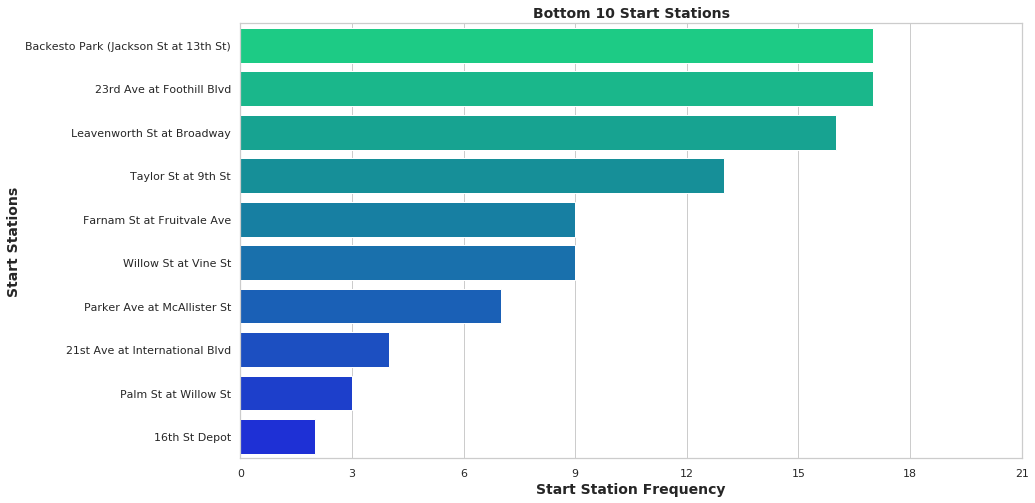

In [31]:
# Plot the bottom 10 departing stations
top_bottom_stations(go_bike_df_with_no_outlier,top=False,pal_col='winter',col='start_station_name',
                   xlabel='Start Station Frequency',
                   ylabel='Start Stations',
                   title='Bottom 10 Start Stations')

### What are the top destination 10 stations 
- Which stations are the busiest in terms of destination stations. Among the ten most used stations for destination trips, we can see that, the `San Francisco Caltran Station 2(Townsend St at 4th St)` and the `Market St at 10th St` with almost `5000` and close to `4000` records respectively. This proves that, most users prefer to use the `San Francisco Caltran Station 2(Townsend St at 4th St)` as a destination stop more than the most used departing station.

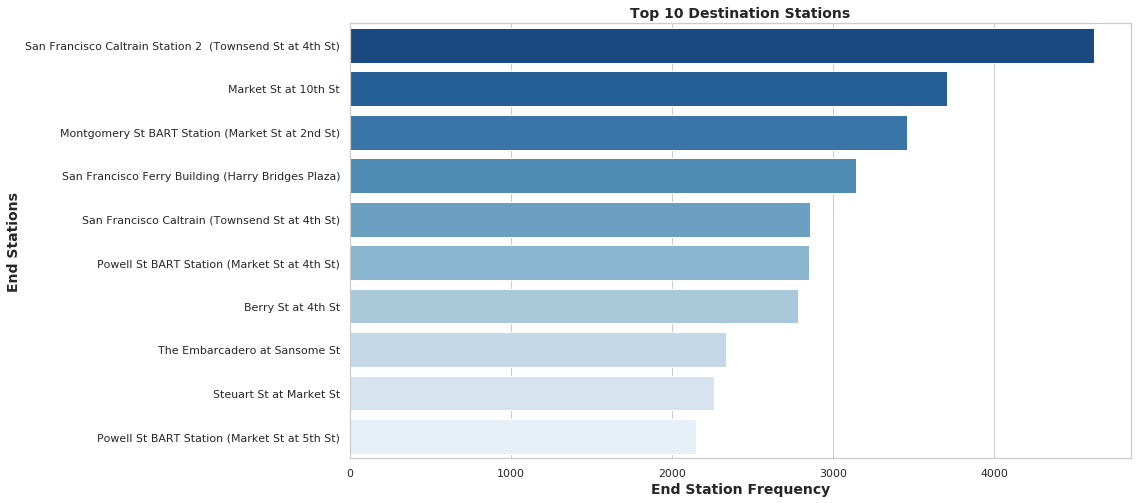

In [32]:
top_bottom_stations(go_bike_df_with_no_outlier,pal_col='Blues',col='end_station_name',
                   xlabel='End Station Frequency',
                   ylabel='End Stations',
                   title='Top 10 Destination Stations')

### What are the bottom 10 destination stations 
- Which stations are the least patronize for stopping strips. Some destination stations have a poor records. The least performing the stations are `16th St Depot`, `Willlow St at Vine St`, `21st Ave at International Bivd` with `4`,`4`,`5` respectively 

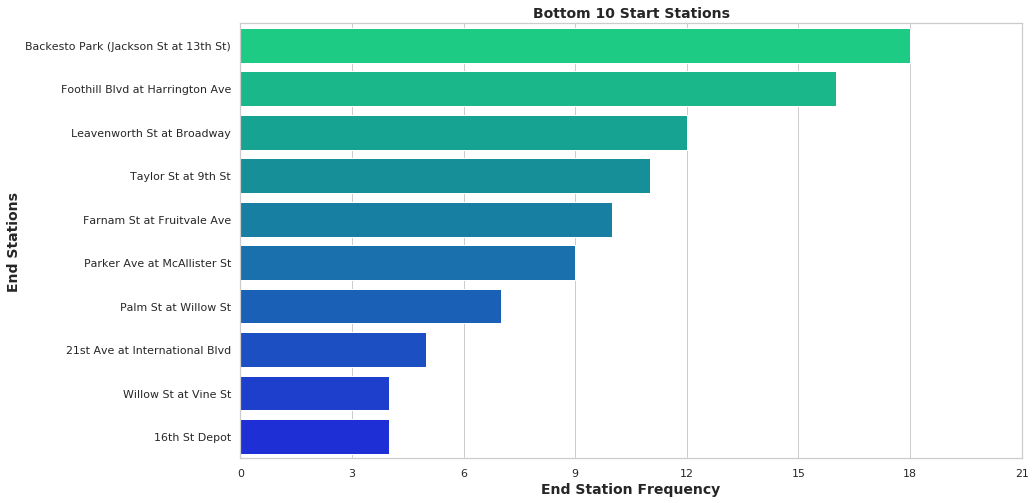

In [33]:
top_bottom_stations(go_bike_df_with_no_outlier,top=False,pal_col='winter',col='end_station_name',
                   xlabel='End Station Frequency',
                   ylabel='End Stations',
                   title='Bottom 10 Start Stations')

In [34]:
def scatterplot(data='',col='',x='',y='',xlabel='',ylabel='',title='',hue=''):
    
    """
    This is a scatter plot that will plot the relationship between the xlabel
    and ylabel. This plot makes use of seaborn's regplot by plotting one replot
    on top of another
    """
    col_val = list(data[col].unique())
    colors_option = ['blue','cyan','red']
    pick_col = colors_option[0:len(col_val)]
    for element in col_val:
        for color in pick_col:
            sel_col = color
            sb.regplot(data=data[data[col]==element],color=sel_col,fit_reg=False, x=x, y=y,scatter_kws={'alpha':1/5},x_jitter=0.25);
            
            # Enlarge the plot after plotting
            plt.gcf().set_size_inches(14, 8)
            
            # set the axis labels and format appropriately
            plt.xlabel(xlabel, fontsize=14,fontweight='semibold');
            plt.ylabel(ylabel, fontsize=14,fontweight='semibold');
            plt.title(title, fontsize=14,fontweight='semibold');
            plt.legend(col_val,frameon=True,shadow=True,fontsize='medium',loc='best')
            

## Do we have a relationship between the age distribution and duration of ride?

- Just as expected, the older bike users don't ride for much longer. Most customers don't go beyond 50 mins ride in general.

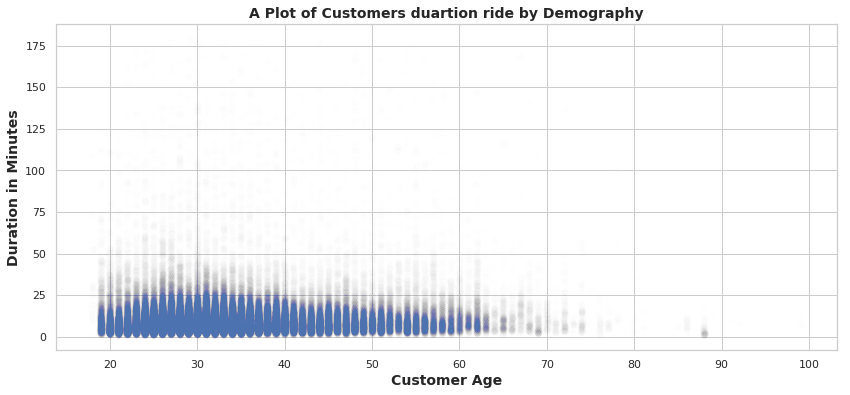

In [35]:
plt.figure(figsize=(14,6));
sb.regplot(data=go_bike_df_with_no_outlier, x='age', y='duration_min', fit_reg=False, scatter_kws={"alpha":1/500},y_jitter=0.3, x_jitter=0.13);
# set the axis labels and format appropriately
plt.ylabel("Duration in Minutes", fontsize=14,fontweight='semibold');
plt.xlabel("Customer Age", fontsize=14,fontweight='semibold');
plt.title("A Plot of Customers duartion ride by Demography", fontsize=14,fontweight='semibold');
#plt.legend(col_val,frameon=True,shadow=True,fontsize='medium',loc='best')

## Do we have a relationship between the age distribution and duration of ride?

> This heatmap shows that, the bulk of our customers are between 20 and 40 years old while they ride for close to 20 mins. Interestingly, this heatmap gives a more indepth insight analysis into the scatter plot above, and although the scatter plot was showing bulk data around the 50 mins mark, this plot tells us that, the highest number of customers don't even ride beyond 10 mins. This kind of make sense as nobody wants to rent a bike and go on a long journey trip. In the figure, 25000, and 24000 users between the ages of 25 years and 30 years respectively dominate our demography and riding for around 10 mins.

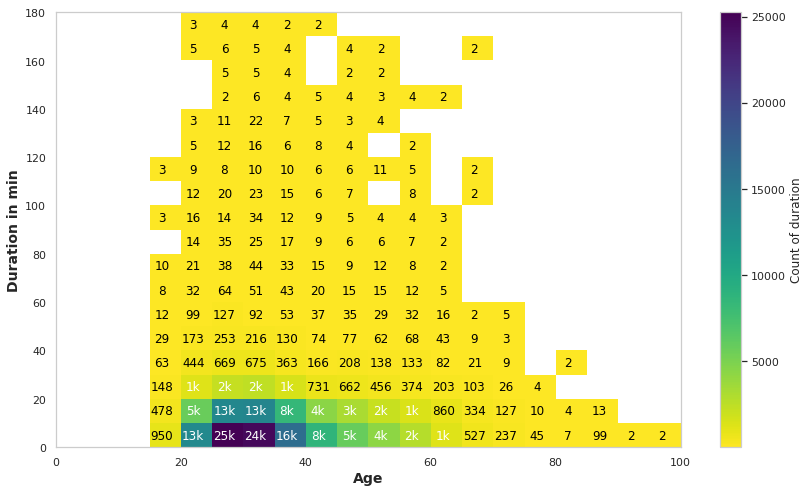

In [36]:
fig, ax = plt.subplots()
fig.set_tight_layout(False)

bins_x = np.arange(0, go_bike_df_with_no_outlier['age'].max()+5, 5)
bins_y = np.arange(0,go_bike_df_with_no_outlier['duration_min'].max()+5, 10)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = go_bike_df_with_no_outlier, x = 'age', y = 'duration_min', cmin=2, cmap='viridis_r', bins = [bins_x, bins_y])

plt.grid()
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 1000: # increase visibility on darker cells
            plt.text(bins_x[i]+2, bins_y[j]+5, str(int(c/1000))+"k",
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+2, bins_y[j]+5, int(c),
                     ha = 'center', va = 'center', color = 'black')
            
    plt.gcf().set_size_inches(14, 8)
plt.colorbar(label='Count of duration')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Duration in min', fontsize=14, fontweight='bold');

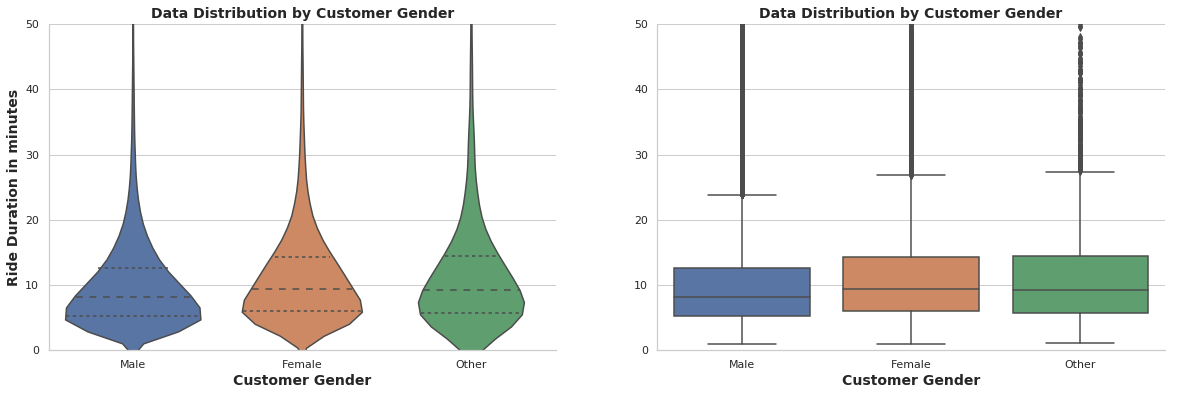

In [37]:
# Set figure size
plt.figure(figsize=(20,6))

# Set the subplot figure to plot the first figure
plt.subplot(1,2,1)

# PLot the LHS figure, with a violin plot
ax = sb.violinplot(data=go_bike_df_with_no_outlier,x='member_gender',y='duration_min', inner='quartile')
sb.despine()

# set the axis labels and format appropriately
plt.xlabel("Customer Gender", fontsize=14,fontweight='semibold');
plt.ylabel("Ride Duration in minutes", fontsize=14,fontweight='semibold');
plt.title("Data Distribution by Customer Gender", fontsize=14,fontweight='semibold');

# Zoom in the data between the range of 0 and 50 min for better view of what is happening
plt.ylim((0,50));

# Set the subplot figure to plot the second figure
plt.subplot(1,2,2)

# Plot the second chart, which is a box plot. This tells not the distribution but the summary
# statistics of the data points
sb.boxplot(data=go_bike_df_with_no_outlier,x='member_gender',y='duration_min')
sb.despine()

# Use the same y-axis limits as what was used in the violinplot
plt.ylim(ax.get_ylim());

# set the axis labels and format appropriately
plt.xlabel("Customer Gender", fontsize=14,fontweight='semibold');
plt.ylabel(" ", fontsize=14,fontweight='semibold');
plt.title("Data Distribution by Customer Gender", fontsize=14,fontweight='semibold');
#plt.legend(col_val,frameon=True,shadow=True,fontsize='medium',loc='best')

> With the data plots above, the point distribution between all gender type is closely related in terms of statistical summary. However, the intringuing part is that, the boxplot shows that, even though men have a wider distribution than females as shown in the violin plot, the female tend to spend more time with rented bikes than men as depicted by the `25%`, `50% (Median)` and `75%`. Could this mean men ride faster than women or women cover more distance than men? Because faster riding means shorter time. That is another question that needs further features  

In [38]:
go_bike_df_with_no_outlier[go_bike_df_with_no_outlier.member_gender=='Male'].sample(1000).duration_min.median()

8.3249999999999993

In [39]:
go_bike_df_with_no_outlier[go_bike_df_with_no_outlier.member_gender=='Female'].sample(1000).duration_min.median()

9.6166666666666671

### How do user types compare to each other in terms of gender
- Male customers generally have a higher dominance in the market, but to confirm if the user_type category shows anything different, we can perform a bivariate plot on their distribution.
- The plot also shows how our data is clearly dominated across the whole data by the male gender and customer type. And we can see that, almost all the Other gender is concentrated in the Subscriber Category.

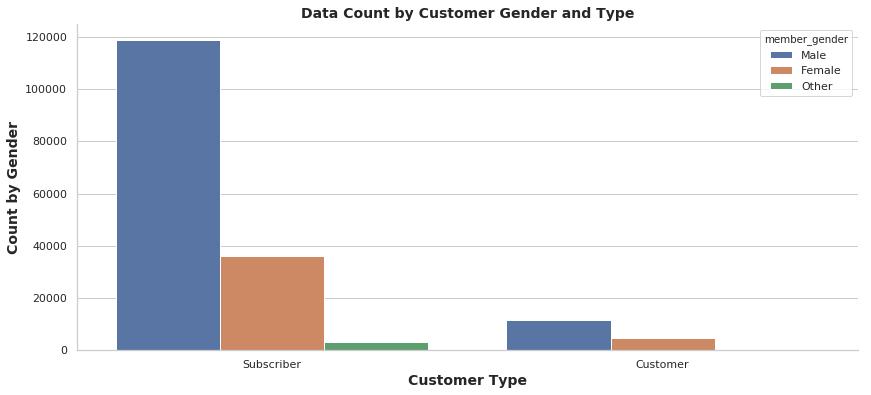

In [40]:
plt.figure(figsize=(14,6));
sb.countplot(data=go_bike_df_with_no_outlier, x='user_type',hue='member_gender');

sb.despine()

# set the axis labels and format appropriately
plt.xlabel("Customer Type", fontsize=14,fontweight='semibold');
plt.ylabel("Count by Gender", fontsize=14,fontweight='semibold');
plt.title("Data Count by Customer Gender and Type", fontsize=14,fontweight='semibold');

In [41]:
def single_lineplot(data,x='',y='',hue_col=None,estimator = '', xlabel="",ylabel="",title1="",order=None):
    
    """
        A function that plot a single line chart. The hue_col is the column value that is set for the 
        hue argument for the seaborn lineplot, while the estimator is the parameter that defines the 
        the statistical value to be used in the plot
    """
    # Set figure size
    plt.figure(figsize=(20,6));
    
    # set seaborn grid style
    sb.set(style="whitegrid")
    
    # Avg plot of the hours by daily hours
    mean_plot = sb.lineplot(data=data,x=x,y=y,estimator=estimator,hue=hue_col,style=hue_col);
    # Show the ticks on the x-axis to appear in a 24 hr format
    #plt.xticks(np.arange(0,24,1));
    
    #Set and label the axis properly and accordingly
    plt.xlabel(xlabel, fontsize=14,fontweight='semibold');
    plt.ylabel(ylabel, fontsize=14,fontweight='semibold');
    plt.title(title1, fontsize=14,fontweight='semibold');

### How many Subscribers share bikes for all trips

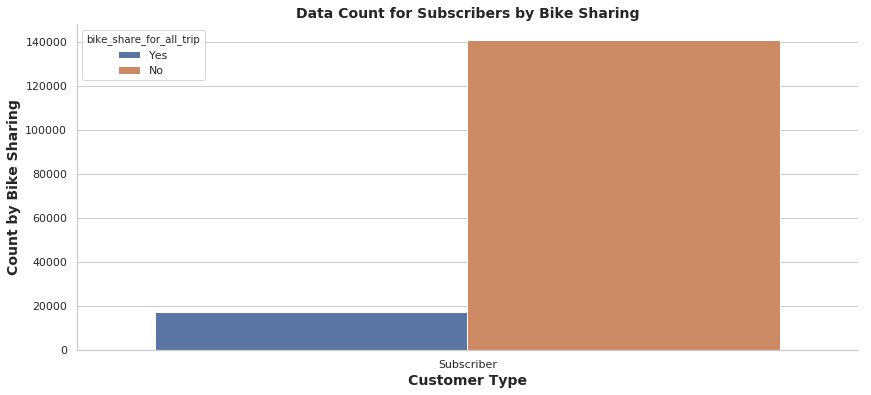

In [42]:
plt.figure(figsize=(14,6));
subscribers = go_bike_df_with_no_outlier[go_bike_df_with_no_outlier['user_type']=='Subscriber']
sb.countplot(data=subscribers, x='user_type',hue='bike_share_for_all_trip')
sb.despine()

# set the axis labels and format appropriately
plt.xlabel("Customer Type", fontsize=14,fontweight='semibold');
plt.ylabel("Count by Bike Sharing", fontsize=14,fontweight='semibold');
plt.title("Data Count for Subscribers by Bike Sharing", fontsize=14,fontweight='semibold');

### How do Customers perform by Days of the week

- The plot below is an indication that, male customers always rent bikes more than any other gender anyday of the week. However, it can be seen that, weekends(Sat and Sun) record the lowest records in our data. This is because, customers don't usually go out over the weekend after a long day of work. 

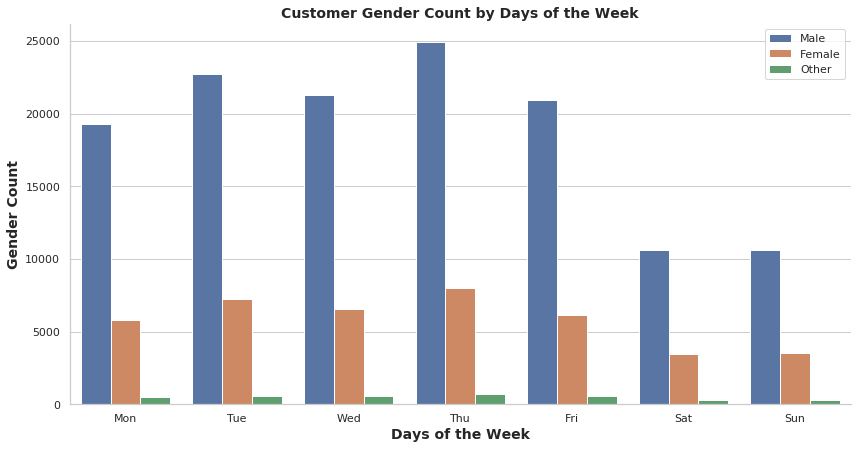

In [43]:

sb.countplot(x='start_time_weekday',hue='member_gender',data=go_bike_df_with_no_outlier,order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);
sb.despine();
plt.gcf().set_size_inches(14, 7);

# set the axis labels and format appropriately
plt.xlabel("Days of the Week", fontsize=14,fontweight='semibold');
plt.ylabel("Gender Count", fontsize=14,fontweight='semibold');
plt.title("Customer Gender Count by Days of the Week", fontsize=14,fontweight='semibold');
plt.legend();

In [44]:
def top_bottom_stations(data,row='name',col=None,top=True,pal_col=None,xlabel=None,ylabel=None,title=None):
    if top:
        most_used_start_stations = data[col].value_counts().head(10).reset_index()
        most_used_start_stations = most_used_start_stations.rename({"index":"name"}, axis=1)
        
        sb.set(style="whitegrid")
        pal = sb.color_palette(pal_col, len(most_used_start_stations))
        
        sb.barplot(data=most_used_start_stations,y=row,x=col, palette=np.array(pal[::-1]))
        plt.gcf().set_size_inches(14, 8)
        
        plt.xlabel(xlabel, fontsize=14,fontweight='semibold');
        plt.ylabel(ylabel, fontsize=14,fontweight='semibold');
        plt.title(title, fontsize=14,fontweight='semibold');
        

### Create a new dataset that counts how many minutes each stations have recorded

- The code below loops over each unique departing station name, then count how many minutes in total has been recorded for each. This will tell us if the busiest station is actually the station with more time under their names. 

In [45]:
busy_station = go_bike_df_with_no_outlier.start_station_name.unique()

station_time_spent = []

for i in busy_station:
    f = go_bike_df_with_no_outlier[go_bike_df_with_no_outlier['start_station_name']==i].duration_min.sum()
    station_time_spent.append(f)

data2 = pd.DataFrame({'name':busy_station,'total_time':station_time_spent})


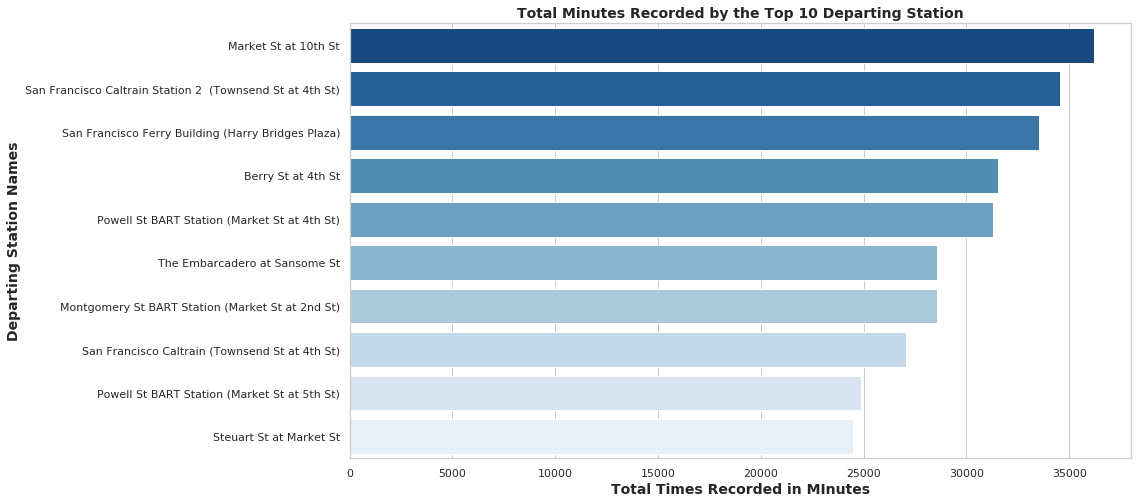

In [46]:
fig, ax = plt.subplots()
fig.set_tight_layout(False)

top_10_station_with_longest_duration = data2.sort_values(by='total_time',ascending=False).head(10);

sb.set(style="whitegrid", color_codes=True)
pal = sb.color_palette("Blues", len(top_10_station_with_longest_duration))

sb.barplot(data=top_10_station_with_longest_duration,y='name',x='total_time',palette=np.array(pal[::-1]))
plt.gcf().set_size_inches(14, 8)

plt.xlabel("Total Times Recorded in MInutes", fontsize=14,fontweight='semibold');
plt.ylabel("Departing Station Names", fontsize=14,fontweight='semibold');
plt.title("Total Minutes Recorded by the Top 10 Departing Station", fontsize=14,fontweight='semibold');

- The graph above shows the `Market St at 10th St` is the busiest and also the station with the highest total minutes recorded. It recorded over 35,000 mins in the month of February 2019 for all customers

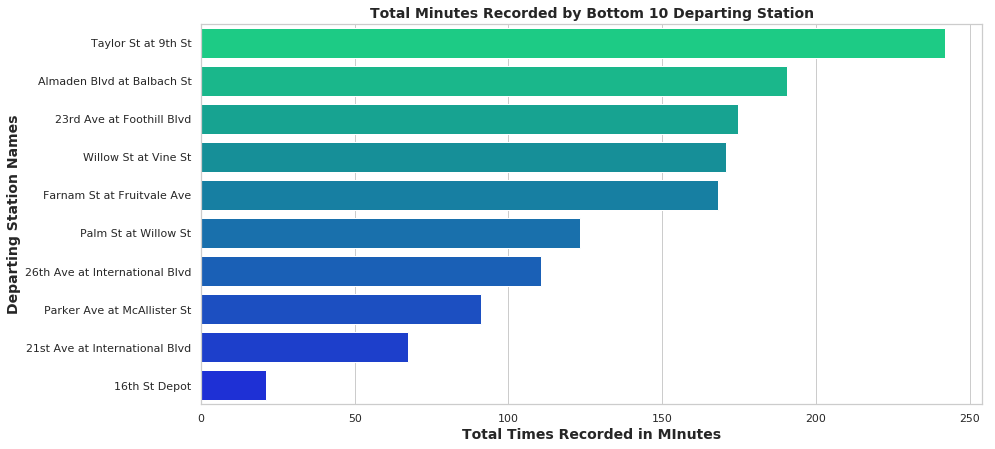

In [47]:
fig, ax = plt.subplots()
fig.set_tight_layout(False)

bottom_10_station_with_longest_duration = data2.sort_values(by='total_time',ascending=False).dropna().tail(10);

sb.set(style="whitegrid")
pal = sb.color_palette("winter", len(bottom_10_station_with_longest_duration))

sb.barplot(data=bottom_10_station_with_longest_duration,y='name',x='total_time',palette=np.array(pal[::-1]))
plt.gcf().set_size_inches(14, 7);

plt.xlabel("Total Times Recorded in MInutes", fontsize=14,fontweight='semibold');
plt.ylabel("Departing Station Names", fontsize=14,fontweight='semibold');
plt.title("Total Minutes Recorded by Bottom 10 Departing Station", fontsize=14,fontweight='semibold');

- The `16th St Depot` has only recorded a total of just little over 20 mins

### Explore total minutes by customers over the period of the month
- We use the single_lineplot() function to calculate this. The last day of the month (28th of Feb) has the highest minutes recorded. 
- The 3rd and 9th and 13th day of the month record the lowest minutes per day of the month. A further investigation revealed 2 intersting points.
       1- The 3rd and 9th are weekends, which perfectly conforms with our earlier insight when weekends have lower total minutes
       
       2- However, a further investigation shows that the 13th of Feb is the only weekday that has such a low level of engagement in total. Knowing that the following day is the Valentine's day, could be be accountable for the decline in minutes drop or just a coincidence. I assume a bigger data will be needed to confirm this assumption

### For everyday that riders rent bikes, which day proved the busiest in the month of February

- The month with the highest minutes recorded was the last day of the month, 28th of February. The weekends of the 3rd and 9th have the lowest minutes. However a unique observation if the 13th, which is the only weekday with a ridiculously low records. This is the International Condoms Day, a day before Valentine's day. This could be coincidental, however, it's a nice point to observe.

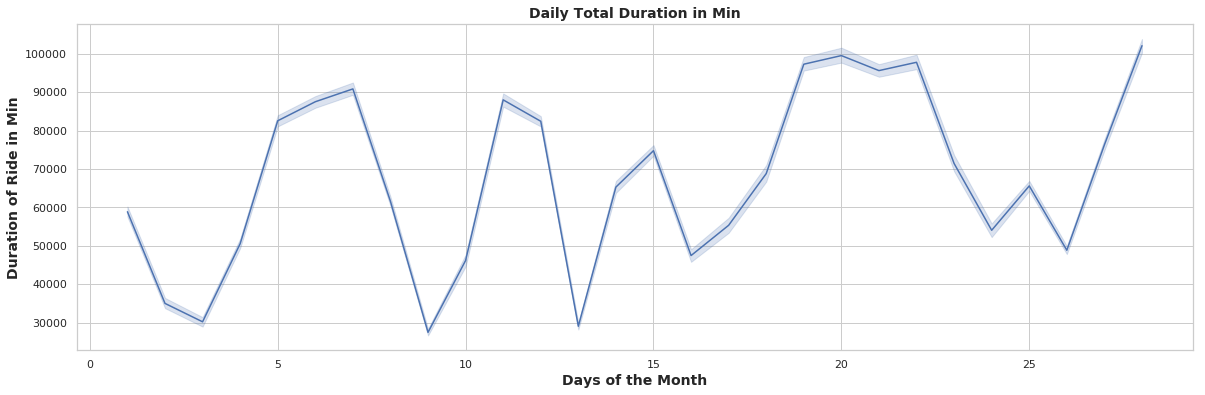

In [48]:

single_lineplot(data=go_bike_df_with_no_outlier,x='day',y='duration_min',estimator='sum',
               xlabel="Days of the Month", ylabel='Duration of Ride in Min',title1='Daily Total Duration in Min')

### How do we determine the breakdown of gender engagement by departing station

In [49]:
busy_station = go_bike_df_with_no_outlier.start_station_name.unique()
#display(busy_station)
female = []
male = []
others = []

for i in busy_station:
    f = go_bike_df_with_no_outlier[(go_bike_df_with_no_outlier['start_station_name']==i)&(go_bike_df_with_no_outlier['member_gender']=='Female')].member_gender.count()
    
    female.append(f)
    
    m = go_bike_df_with_no_outlier[(go_bike_df_with_no_outlier['start_station_name']==i)&(go_bike_df_with_no_outlier['member_gender']=='Male')].member_gender.count()
    male.append(m)
    
    o = go_bike_df_with_no_outlier[(go_bike_df_with_no_outlier['start_station_name']==i)&(go_bike_df_with_no_outlier['member_gender']=='Others')].member_gender.count()
    others.append(o)
    

# Create a new dataframe into a variable called data3    
data3 = pd.DataFrame({'Name':busy_station,'Female':female,'Male':male,'Other':others})

# Generate a new column called Total, that adds all columns together
data3['Total'] = data3['Female']+data3['Male']+data3['Other']


In [50]:
def horz_stack_barplot(data,col=None, top=True,x=None,y=None,xlabel=None,ylabel=None,title=None):
    
    if not top:
        male_female_10 = data.sort_values(by=x, ascending=False).dropna().tail(10)
        
        col_val = ['Total','Female','Other']
        colors_option = ['cyan','blue','red']
        pick_col = colors_option[0:len(col_val)]
        
        for i in col_val:
                    
            for j in pick_col:
                sel_col = j
                        
            fig, ax = plt.subplots()
            fig.set_tight_layout(False)
                        
                    
            sb.barplot(data=male_female_10, x='Total',y=y,color=colors_option[0]);
            sb.barplot(data=male_female_10, x='Female',y=y,color=colors_option[1]);
            sb.barplot(data=male_female_10, x='Other',y=y,color=colors_option[2]);
                    
            sb.set(style="whitegrid")
            
            plt.gcf().set_size_inches(14, 8)
                    
            plt.xlabel(xlabel, fontsize=14,fontweight='semibold');
            plt.ylabel(ylabel, fontsize=14,fontweight='semibold');
            plt.title(title, fontsize=14);
            plt.legend(col_val,frameon=True,shadow=True,fontsize='medium',loc='best')
                        
            return None
            
    else:
        male_female_10 = data.sort_values(by=x, ascending=False).dropna().head(10)
        
        col_val = ['Total','Female','Other']
        colors_option = ['cyan','blue','red']
        pick_col = colors_option[0:len(col_val)]
        
        #rounds = len(col_val)
        #while rounds > 1:
        for i in col_val:
                    
            for j in pick_col:
                sel_col = j
                        
            fig, ax = plt.subplots()
            fig.set_tight_layout(False)
                        
                    
            sb.barplot(data=male_female_10, x='Total',y=y,color=colors_option[0]);
            sb.barplot(data=male_female_10, x='Female',y=y,color=colors_option[1]);
            sb.barplot(data=male_female_10, x='Other',y=y,color=colors_option[2]);
                #rounds = rounds-1
                    
            sb.set(style="whitegrid")
            
            plt.gcf().set_size_inches(14, 8)
                    
            plt.xlabel(xlabel, fontsize=14,fontweight='semibold');
            plt.ylabel(ylabel, fontsize=14,fontweight='semibold');
            plt.title(title, fontsize=14,fontweight='bold');
            plt.legend(col_val,frameon=True,shadow=True,fontsize='medium',loc='best')
                     
            return None

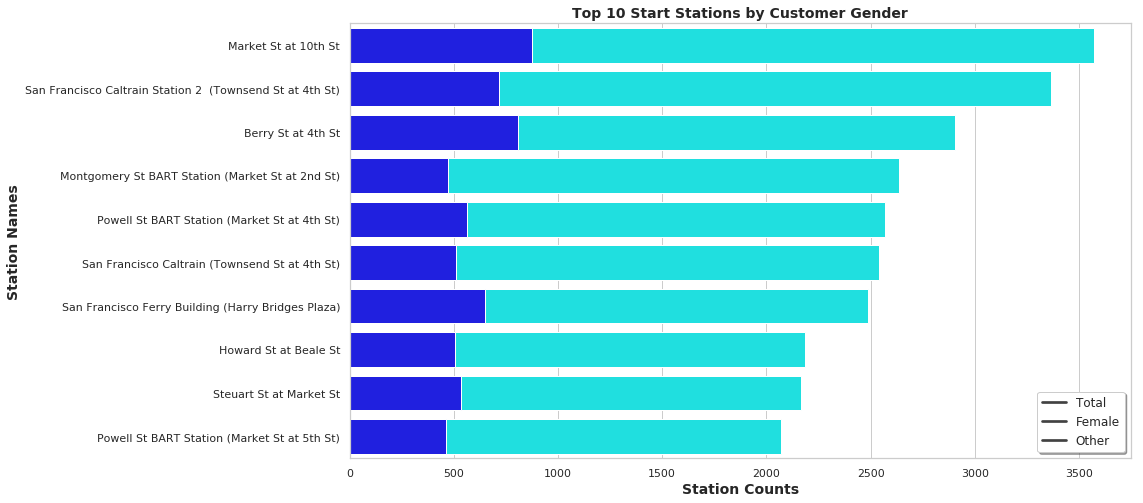

In [51]:
# Plot the top 10 Stations by gender
horz_stack_barplot(data=data3,x='Total',y='Name',
                   xlabel='Station Counts',
                   ylabel='Station Names', 
                   title='Top 10 Start Stations by Customer Gender')

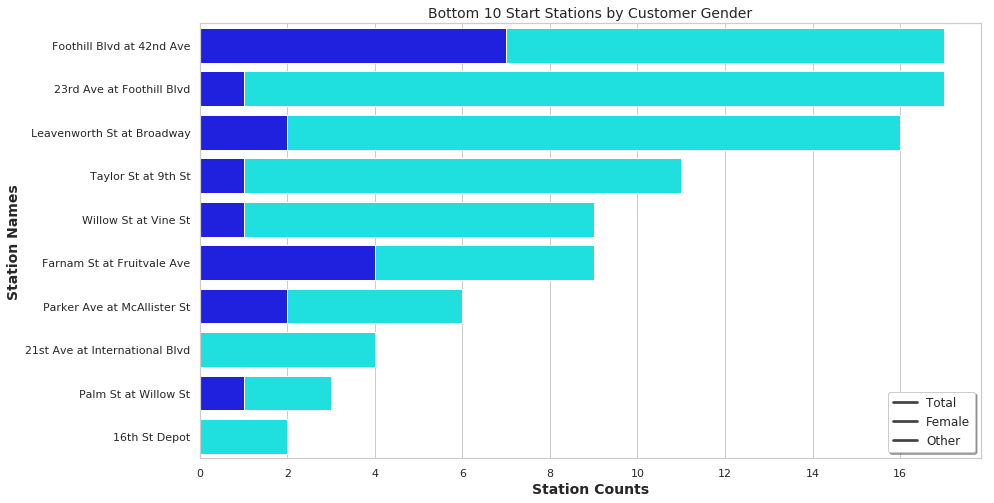

In [52]:
# Plot the bottom 10 Stations by gender
horz_stack_barplot(data=data3,x='Total',y='Name',top=False,
                   xlabel='Station Counts',
                   ylabel='Station Names', 
                   title='Bottom 10 Start Stations by Customer Gender')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> A few observations were made;
- Weekends have low data records. 
- Most customers are males, but they have a shorter ride period compared to the females
- The 13th of Feb, which is the `International Condoms Day`, a day before valentine's day is the only weekday with a very low data. This could be coincidental, however, a bigger dataset will be needed to ascertain this. 
- Our customers are mostly concentrated between the 20 and 40 years range and they mostly undertake short trips


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>                                                                                
- Most Bikers dont share their bikes between trips.
- The busiest departing stations are not necessarily the busiest destination stations.

## Multivariate Exploration


In [53]:
def lineplots(data,x=None,y=None,hue_col=None,xlabel="",ylabel="",title1="",title2=""):
    
    """
    This function creates 2 lineplots. A mean and standard deviation of the column in question.
    The reason for the standard dev is to visualize how spread or wide the data are far apart, this is
    because, the mean of a data can be prone to outiers. The hue_col argument defines the difference
    between the different values in the columns in question
    """
    # Set figure size
    plt.figure(figsize=(20,6));
    
    # set seaborn grid style
    sb.set(style="whitegrid")
    
    # Using subplot, plot the first plot
    plt.subplot(1,2,1);
    
    # Avg plot of the hours by daily hours
    mean_plot = sb.lineplot(data=data,x=x,y=y,estimator='mean',hue=hue_col,style=hue_col,);
    plt.ylim((0,50))
    
    #Set and label the axis properly and accordingly
    plt.xlabel(xlabel, fontsize=14,fontweight='semibold');
    plt.ylabel(ylabel, fontsize=14,fontweight='semibold');
    plt.title(title1, fontsize=14,fontweight='semibold');
    
    # Using subplot, plot the second plot
    plt.subplot(1,2,2);
    # Std-Dev plot of the hours by daily hours to show the degree of 
    # spread of the data away from each mean
    std_plot  = sb.lineplot(data=data,x=x,y=y,estimator='std', hue=hue_col,style=hue_col);
    #plt.xticks(np.arange(0,24,1));
    plt.ylim((0,50))
    
    #Set and label the axis properly and accordingly
    plt.xlabel(xlabel, fontsize=14,fontweight='semibold');
    plt.ylabel(ylabel, fontsize=14,fontweight='semibold');
    plt.title(title2, fontsize=14,fontweight='semibold');

### Bike Ride Duration of all Genders by User Type

- On a general note, we can see as shown in the boxplot that, Customers user types have a higher duration ride than Subscriber user type. Furthermore, the female chart of the plot tell us that females spend longer with their rides.

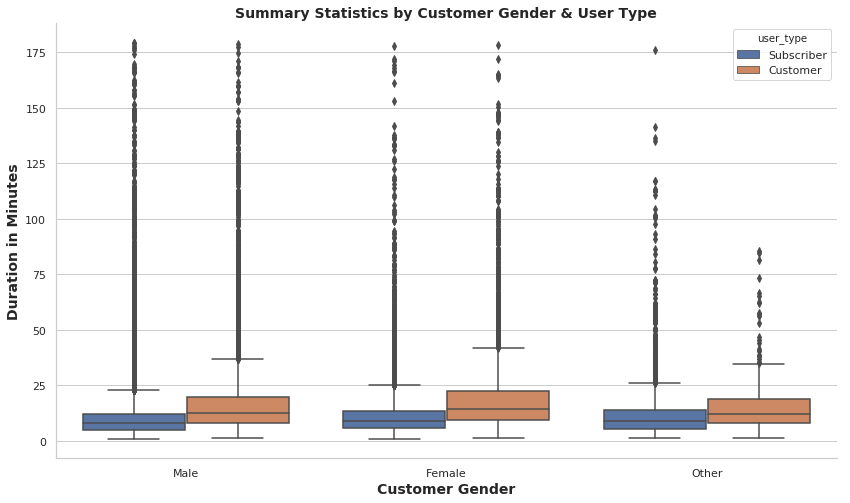

In [54]:
fig, ax = plt.subplots()
fig.set_tight_layout(False)

sb.boxplot(data=go_bike_df_with_no_outlier,x='member_gender',y='duration_min', hue='user_type');
sb.despine();

plt.gcf().set_size_inches(14, 8);

# set the axis labels and format appropriately
plt.xlabel("Customer Gender", fontsize=14,fontweight='semibold');
plt.ylabel("Duration in Minutes", fontsize=14,fontweight='semibold');
plt.title("Summary Statistics by Customer Gender & User Type", fontsize=14,fontweight='semibold');

### User Types  Performance by Demography

- The plot on the left is the average of the customers duration by age. But to determine how the data varies from the mean, we need to understand the variability and here is where the standard-deviation plot on the right comes in. There is close to zero deviation somewhere around the 75 years Customers and Subscribers. Customers aged 74 recorded the highest average duration of over 40 mins with a deviation of 14 mins. Subscribers on the other hand have their highest average riders in the age of 78 years with 28 mins ride and a deviation above 30 mins.

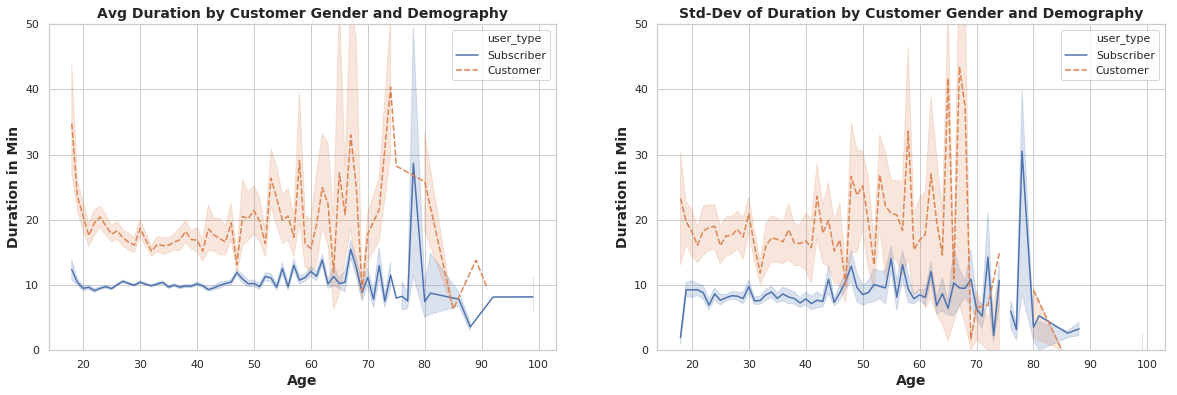

In [55]:
lineplots(data=go_bike_df_with_no_outlier,x='age',y='duration_min',hue_col='user_type',
         ylabel='Duration in Min', xlabel='Age',
         title1='Avg Duration by Customer Gender and Demography',
         title2='Std-Dev of Duration by Customer Gender and Demography')

- The scatter plot below strenghtens the fact that, there is some huge deviation from the mean because we can see the huge distance between data points within the 60 years and 80 years old users. Generally, users duration ride decrease as they age.

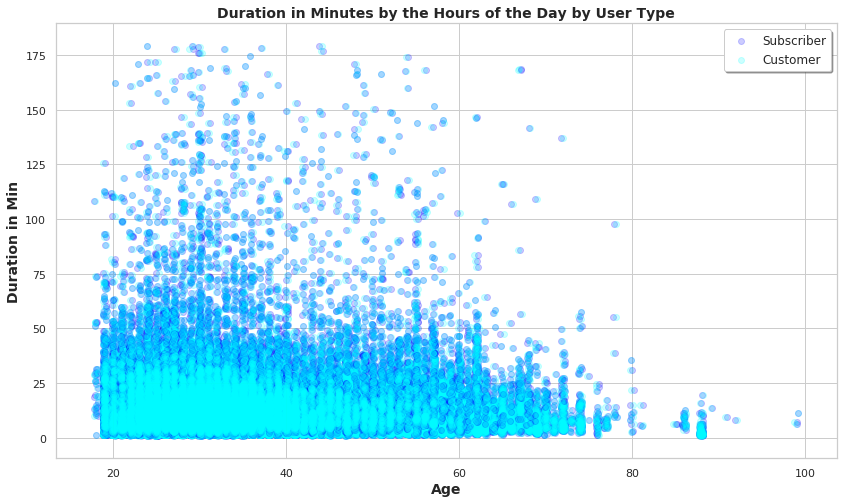

In [56]:
scatterplot(data=go_bike_df_with_no_outlier,col='user_type', x='age', y='duration_min',xlabel="Age",
           ylabel='Duration in Min',title="Duration in Minutes by the Hours of the Day by User Type",hue='member_gender')

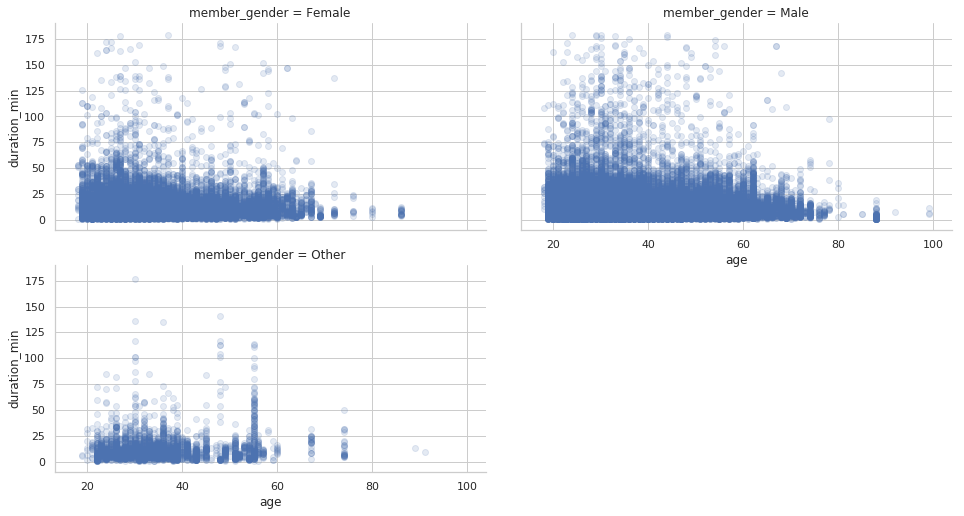

In [57]:

fig.set_tight_layout(False)
sb.set(style="whitegrid")

g = sb.FacetGrid(data=go_bike_df_with_no_outlier, col='member_gender', col_wrap=2,
                 height=5,col_order=['Female','Male','Other']);
g.map(plt.scatter, 'age', 'duration_min', alpha=0.15);

plt.gcf().set_size_inches(14, 7)

- The plot above is a further breakdown of the gender distribution by demography. This gives a clearer view of the gender types with the longest durations. The males obviously ride much longer. While no female above 85 years is recorded to have rented a bike, a few males customers above the 85 years have rented a bike but all below 10 mins 

In [58]:
# Engineer 2 more column that can assist in determining the busiest hours of the days from each station 
# i.e; the start station and end station
go_bike_df_with_no_outlier['end_hours'] = pd.to_datetime(go_bike_df_with_no_outlier['new_end_time'], format='%H:%M:%S').dt.hour
go_bike_df_with_no_outlier['start_hours'] = pd.to_datetime(go_bike_df_with_no_outlier['new_start_time'], format='%H:%M:%S').dt.hour

### What time of the day do we have the highest renatal activities?

- The peak total duration of the day occur at 8am and 5pm. This makes absolute sense because, since working days are the busiest days of the week, it only makes sense to see that, 8am when workers leave for work and 5pm when they return to their homes are the busiest durations of the week.

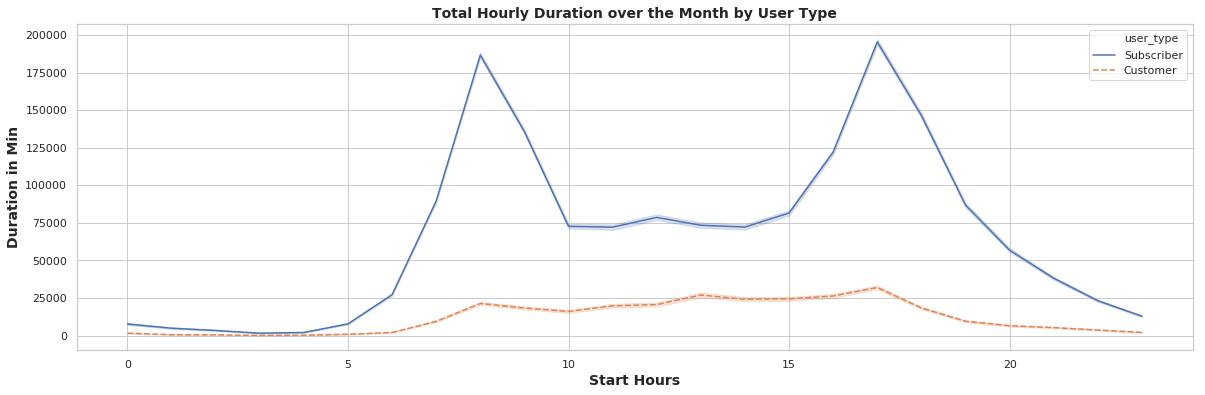

In [59]:
single_lineplot(go_bike_df_with_no_outlier,'start_hours','duration_min',hue_col='user_type',
                estimator='sum', xlabel='Start Hours', ylabel='Duration in Min',
                title1='Total Hourly Duration over the Month by User Type')

### How do customers perform by the day

- Although Subscriber users are much more than Customer user, but they have less average duration ride compared to Customer users. This could be due to the reason why every user is renting the bike. Subscribers are likely to be renting the bike for specific reason like going to work while Customers are renting bikes for pleasure especially on weekends

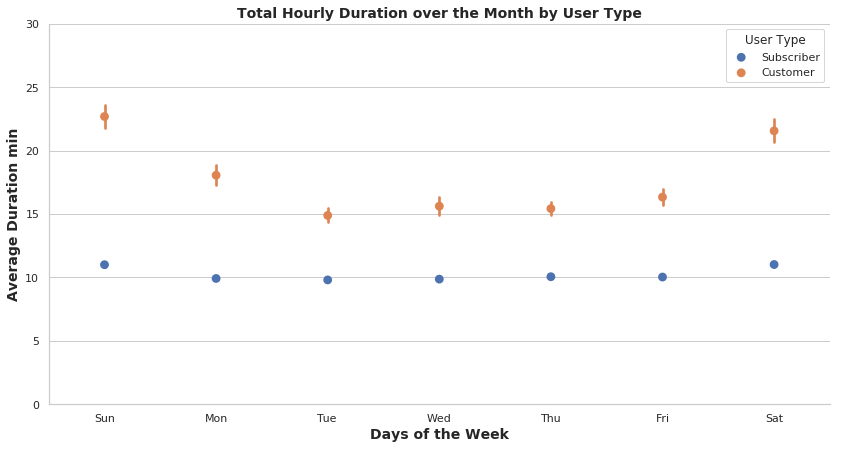

In [60]:


# plot the point plot of month vs user type
sb.pointplot(data=go_bike_df_with_no_outlier, x='start_time_weekday', y='duration_min', hue='user_type',join=False);
plt.gcf().set_size_inches(14, 7);
sb.despine()

plt.ylim((0,30));
plt.xlabel('Days of the Week',fontsize=14,fontweight='bold');
plt.ylabel('Average Duration min',fontsize=14,fontweight='bold');
plt.title('Total Hourly Duration over the Month by User Type',fontsize=14,fontweight='bold');
plt.legend(title='User Type');



### What are the Hourly Trend by User Type at Departing Stations

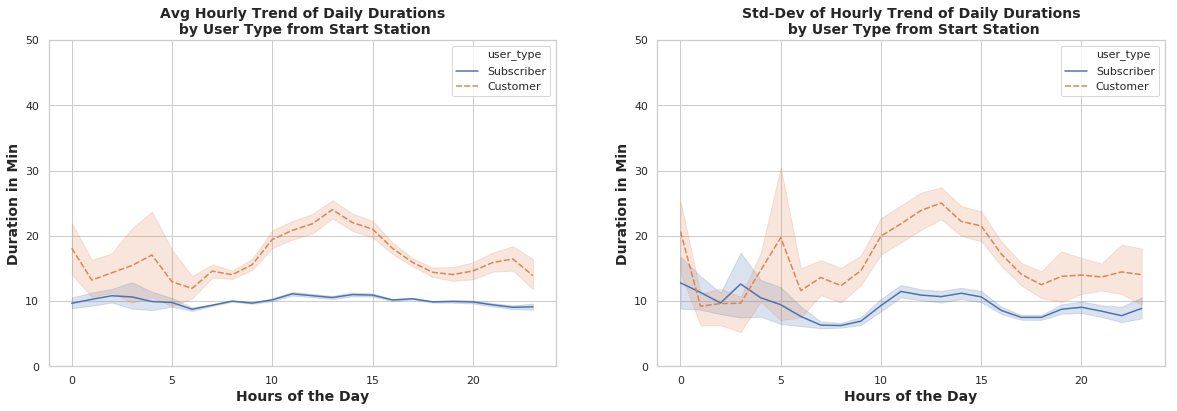

In [61]:
lineplots(go_bike_df_with_no_outlier,'start_hours','duration_min','user_type',
          ylabel='Duration in Min',
          xlabel="Hours of the Day",
          title2='Std-Dev of Hourly Trend of Daily Durations\n by User Type from Start Station',
          title1='Avg Hourly Trend of Daily Durations\n by User Type from Start Station')

- Although there are much more Subscriber customer types than Customer data, customers have recorded a much higher average duration ride than the Subscribers.  

### What are the Hourly Trend by User Type at Destination Stations

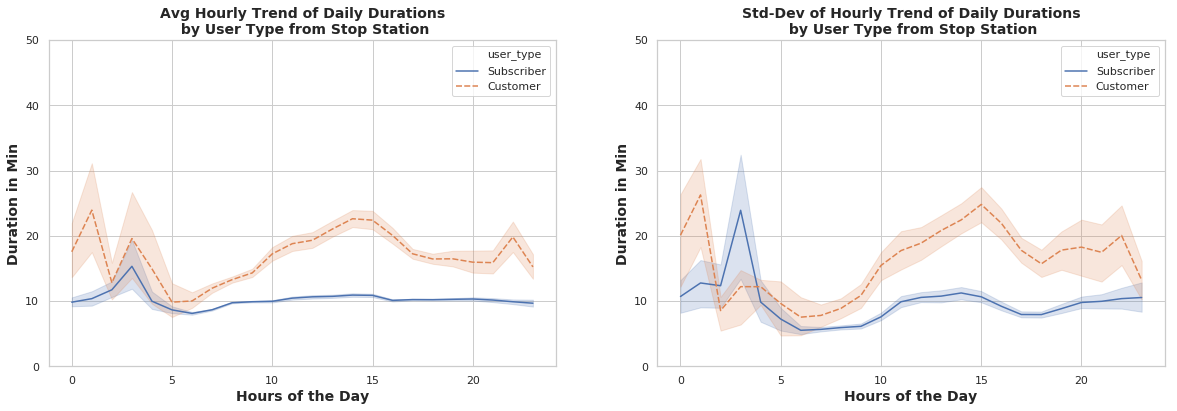

In [62]:
lineplots(go_bike_df_with_no_outlier,'end_hours','duration_min','user_type',
          ylabel='Duration in Min',
          xlabel="Hours of the Day",
          title2='Std-Dev of Hourly Trend of Daily Durations\n by User Type from Stop Station',
          title1='Avg Hourly Trend of Daily Durations\n by User Type from Stop Station')

- The highest average `duration_min` at the destination station for 3am is around 15 mins, by 3am in the morning, thats such a high duration compared to the general duration, the standard deviation shows a bigger variation to the right of the mean however. This is possibly due to a bigger value on that day.

### By the hours of the day, how do users perform duration wise
- A couple of data points around 3am are seen to record average duration over close to 175 mins (~ 3hrs). This accounts for the high deviation that was observed in the previous plot 

In [ ]:
scatterplot(go_bike_df_with_no_outlier,'user_type','end_hours','duration_min',"Hours of the Day",
           'Duration in Min',"Duration in Minutes by the Hours of the Day by User Type")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- For all genders, Customer User Types have a longer ride duration compared to Subscriber User types
- 8am and 5pm recorded the periods of the days with highest durations in total and this makes sense because they both account for the times customers leave for work and go home from work respectively.
- There is a close similarity between data distribution based on male and female customer genders
### Were there any interesting or surprising interactions between features?

- The average Subscribers ride for just 10 mins between Monday and Friday while they make just little over 10 mins on weekends.
- For Customers, they spend more than 2 times the average Subscribers duration ride over the weekend. Although they make lesser ride duration over the week, they still have better rides than Subscribers.

## Conclusions

> With a keen exploration of the data, a number of insights were drawn. However to properly and coincisely explain our key pain points, the following were drawn out as conclusions;

- Bike rentals peaks at both Starting stations and Ending stations at 8am and 5pm while steading between this 2 periods.
- The average duration of our riders lies around 10 mins, however on a further diagnosis, women were observed to spend longer periods than men, although men rented more bikes. This could be due to how fast each gender rides.
- The busiest days of the week are the weekdays. Subscriber are the dominant users of the rental service and hardly share their ride. Because, the assumption that theyr ride for short durations of 10 mins, the deduction is that, their place of work is not very far from their home. On weekends however, Customer users spend more than 2 times the subscribers duration ride on the average. Customers most likely are not going to work with the bike rentals and which accounts for a very low total minutes spend but higher average duration rides.
- `The Market St at 10th St` is the busiest and also the starting station with the highest total minutes recorded. It recorded over 35,000 mins.

In [ ]:
# Use this command if you are running this file in local
#!jupyter nbconvert Ford_GoBike_Analysis.ipynb --to slides --post serve --no-input --no-prompt